In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

import pandas as pd
import numpy as np
import sys

import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

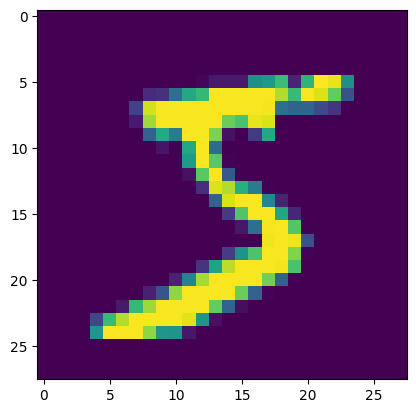

In [4]:
plt.imshow(x_train[0])

In [5]:
#Conv2D = [batch-size(이미지 갯수),width,heigth,depth]

In [6]:
#255로 나누는 이유는 정규화를 위함
x_train_rs=x_train.reshape(60000,28,28,1).astype('float32')/255
x_test_rs=x_test.reshape(10000,28,28,1).astype('float32')/255

In [7]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [8]:
#CNN Model

In [9]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(10,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
hist = model.fit(x_train_rs, y_train_ohe, validation_data=(x_test_rs, y_test_ohe), epochs=100, batch_size=200,callbacks=[early_stopping_callback, checkpoint])

Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.8780 - loss: 0.4205 - val_accuracy: 0.9830 - val_loss: 0.0529
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.9865 - loss: 0.0458 - val_accuracy: 0.9862 - val_loss: 0.0436
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9917 - loss: 0.0283 - val_accuracy: 0.9888 - val_loss: 0.0352
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.9974 - loss: 0.0091 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9975 - loss: 0.0086 - val_accuracy: 0.9886 - val_loss: 0.0373
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9980 - loss:

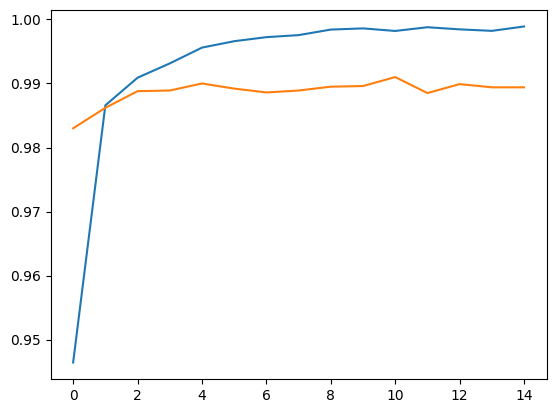

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])